In [1]:
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# STEP 1:Import all relevant libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2:Importing the dataset
#Performing basic EDA

In [9]:
# load the dataset
data=pd.read_csv("house_price.csv")
data

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [11]:
#Creating a copy of data
data1=data.copy()
data1

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [11]:
#Display first 5 rows
data1.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [13]:
#Display last 5 rows
data1.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [15]:
#Display the shape of the data
data1.shape

(13200, 7)

In [17]:
#Display data type of each columns 
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [19]:
#Display the stastical summary of numerical columns
data1.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [21]:
#Display missing/null values
missing_values = data1.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64


In [23]:
#Display duplicate values in the dataset
# checking the total of duplicates
data1.duplicated().sum()

1049

In [25]:
data1.shape

(13200, 7)

In [27]:
#Remove duplicates permanently
data1.drop_duplicates(inplace=True)

In [29]:
#Data shape after removing the duplicates
data1.shape

(12151, 7)

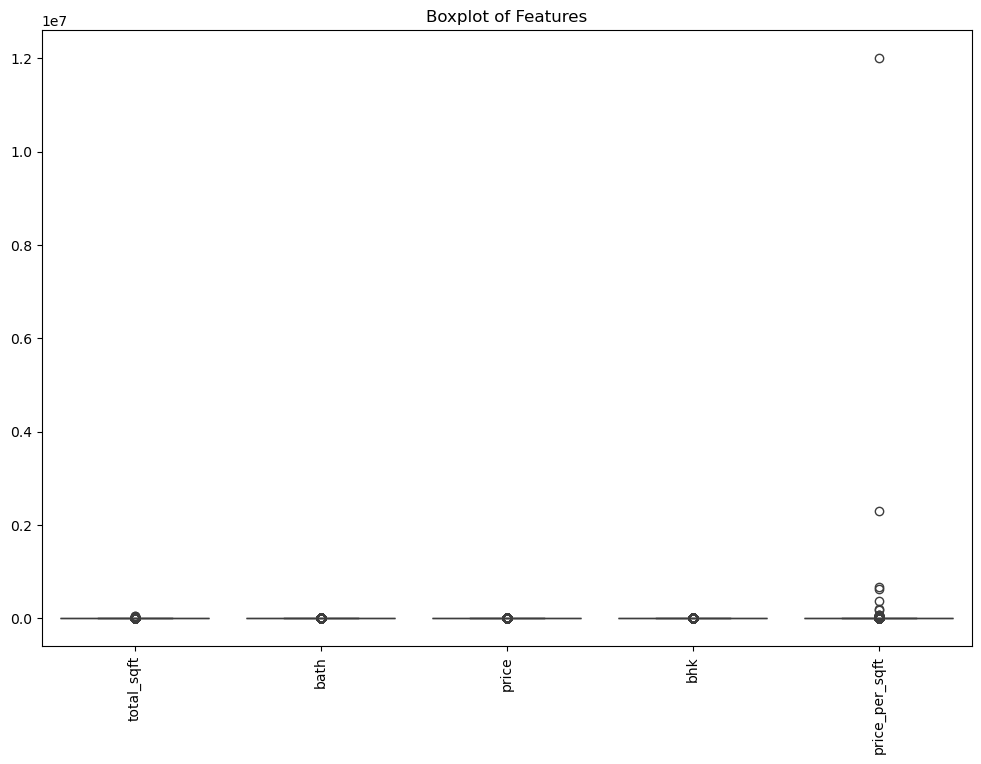

In [33]:
#Check skewness of the data
#Display boxplot of each column
plt.figure(figsize=(12,8))
sns.boxplot(data1)
plt.xticks(rotation=90)
plt.title('Boxplot of Features')
plt.show()

Columns like total_sqft,bath,price,bhk stands out with excess no.of outliers but price_per_sqft also has more  outliers.

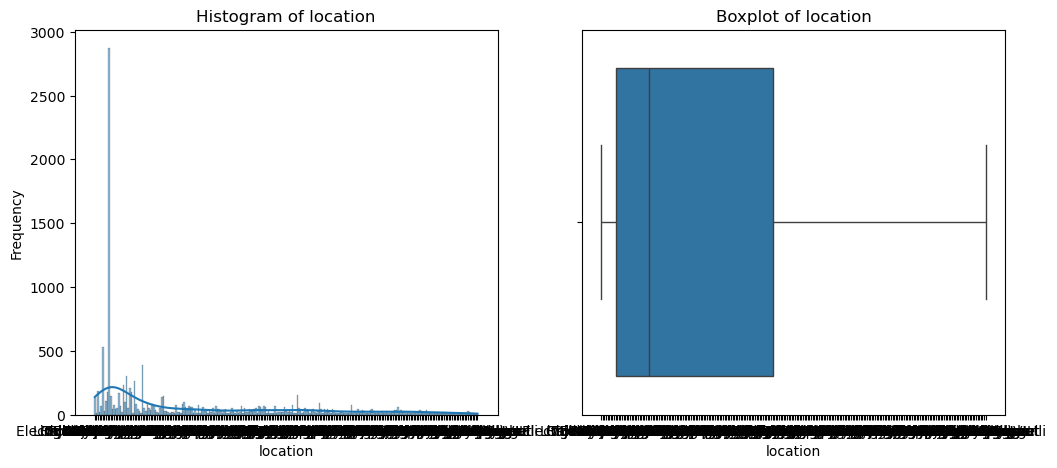

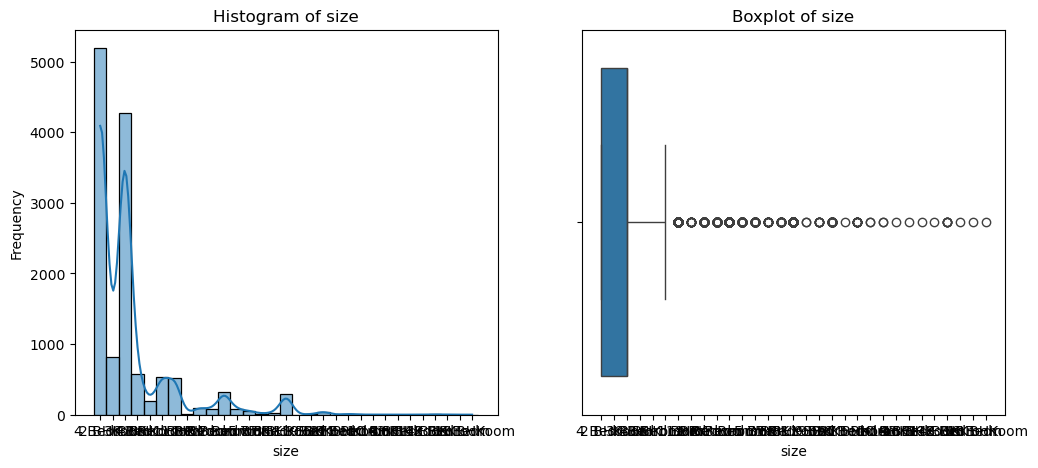

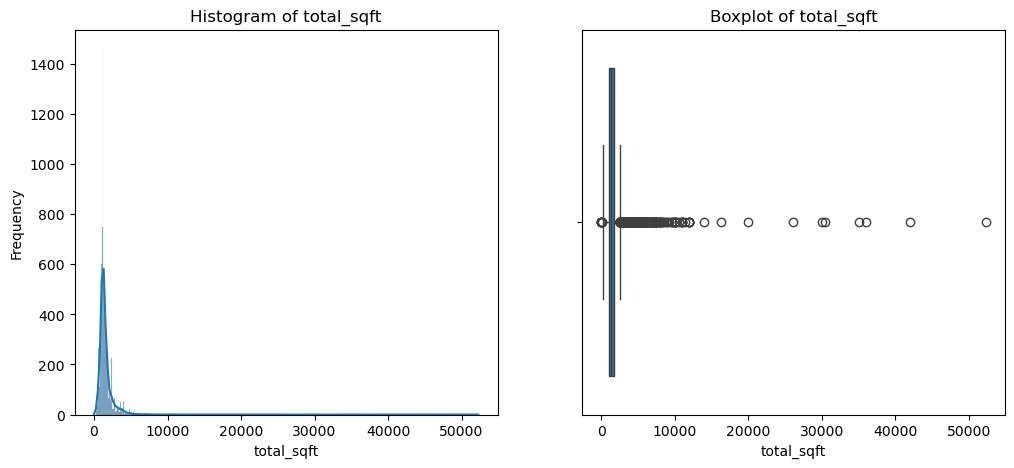

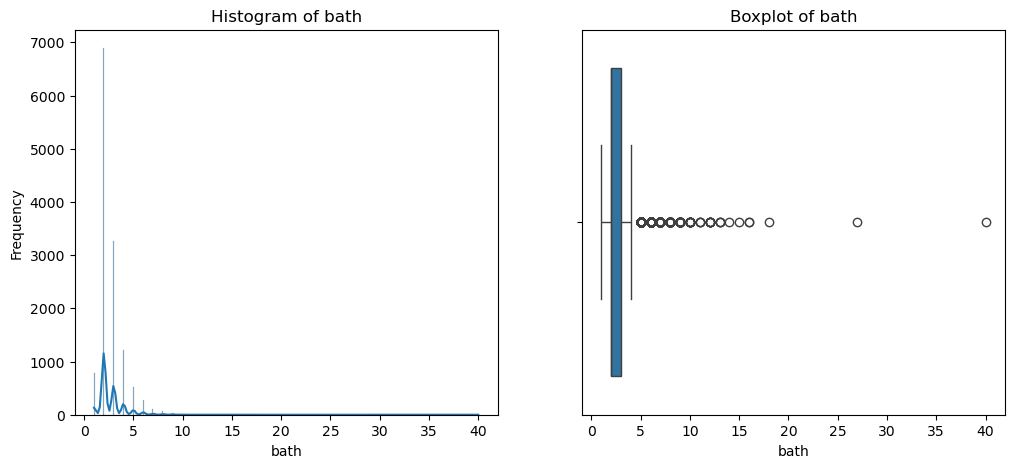

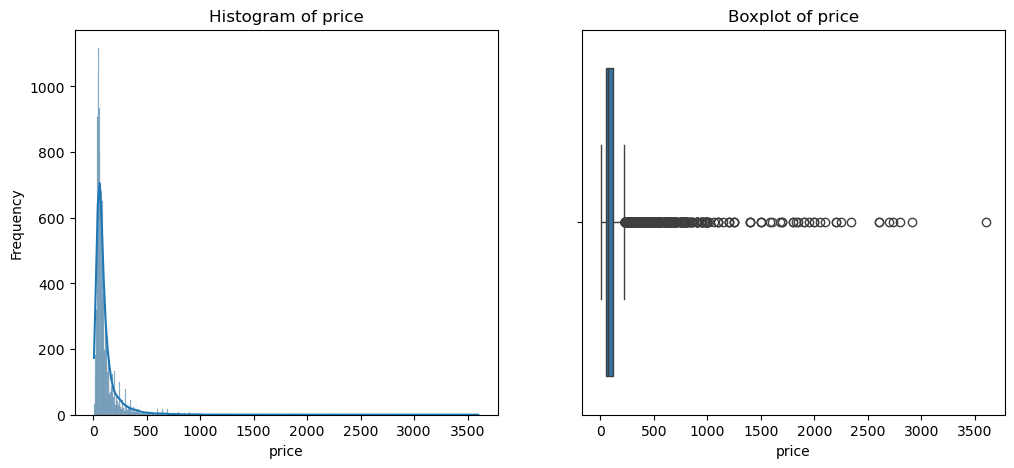

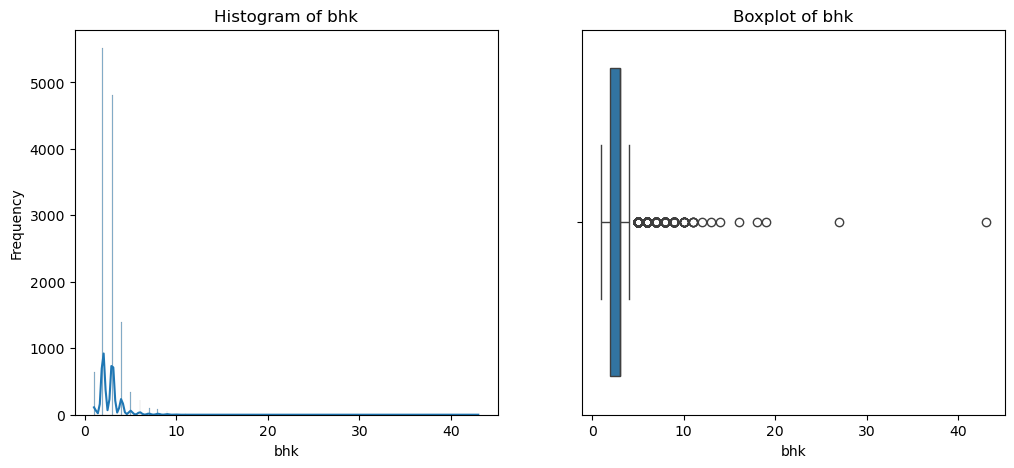

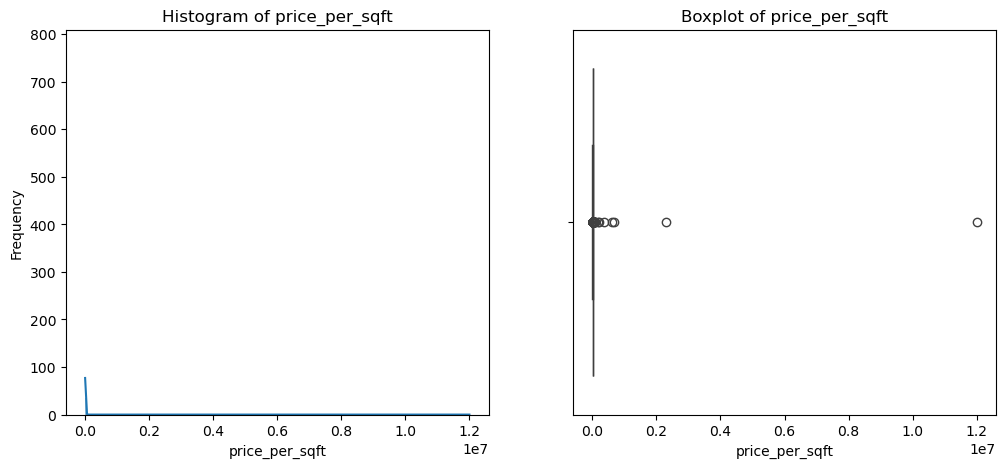

In [35]:
for i in data1.columns:
    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[i], kde=True)
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {i}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[i])
    plt.title(f'Boxplot of {i}')

    plt.show()

Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median 
a) Mean and Standard deviation
b)Percentile method
c) IQR(Inter quartile range method)
d) Z Score method



In [13]:
import pandas as pd
import numpy as np

# a) Mean and Standard Deviation Method
mean = data1['price'].mean()
std_dev = data1['price'].std()
outliers_mean_std = data1[(data1['price'] < mean - 3 * std_dev) | 
                                 (data1['price'] > mean + 3 * std_dev)]

# Remove or cap outliers
data1_trimmed = data1[~data1.isin(outliers_mean_std)]
data1_trimmed

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2.0,3699.0
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4.0,4615.0
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3.0,4305.0
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3.0,6245.0
4,Kothanur,2 BHK,1200.0,2.0,51.00,2.0,4250.0
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5.0,6689.0
13196,other,4 BHK,3600.0,5.0,400.00,4.0,11111.0
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2.0,5258.0
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4.0,10407.0


In [15]:
# # b) Percentile Method
q1 = data1['price'].quantile(0.01)
q99 = data1['price'].quantile(0.99)
outliers_percentile = data1[(data1['price'] < q1) | (data1['price'] > q99)]

# Remove or cap outliers
data1_trimmedpercentile = data1[(data1['price'] >= q1) & (data1['price'] <= q99)]
data1_trimmedpercentile

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [17]:
 # c) IQR Method
Q1 = data1['price'].quantile(0.25)
Q3 = data1['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_iqr = data1[(data1['price'] < lower_bound) | (data1['price'] > upper_bound)]

# Remove or cap outliers
data1_trimmediqr = data1[(data1['price'] >= lower_bound) & (data1['price'] <= upper_bound)]
data1_trimmediqr

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13192,Bellandur,2 BHK,1262.0,2.0,47.00,2,3724
13193,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258


In [21]:
 # d) Z-Score Method
from scipy.stats import zscore
data1['z_score'] = zscore(data1['price'])
outliers_zscore = data1[(data1['z_score'] > 3) | (data1['z_score'] < -3)]

# Remove or cap outliers
data1_trimmed_z_score = data1[(data1['z_score'] <= 3) & (data1['z_score'] >= -3)]
data1_trimmed_z_score

,location,size,total_sqft,bath,price,bhk,price_per_sqft,z_score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699,-0.490756
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615,0.051779
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305,-0.337039
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245,-0.115815
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250,-0.410780
...,...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689,0.795894
13196,other,4 BHK,3600.0,5.0,400.00,4,11111,1.928827
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258,-0.350446
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407,2.518757


In [ ]:
# data1['price'] = np.where(data1['price'] < lower_bound, data1['price'].median(), data1['price'])
# data1['price'] = np.where(data1['price'] > upper_bound, data1['price'].median(), data1['price'])


Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data.



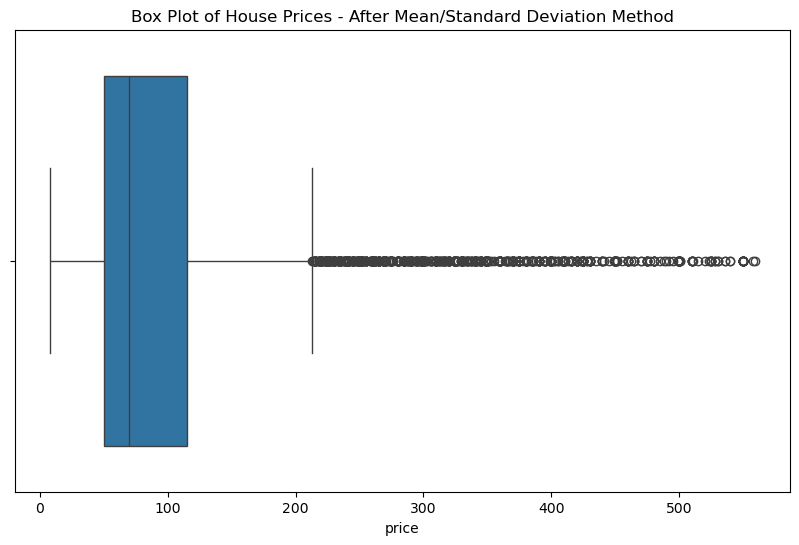

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot after outlier removal using mean/std
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=data1_trimmed)
plt.title('Box Plot of House Prices - After Mean/Standard Deviation Method')
plt.show()


In [ ]:
# A large no.of outliers are there.

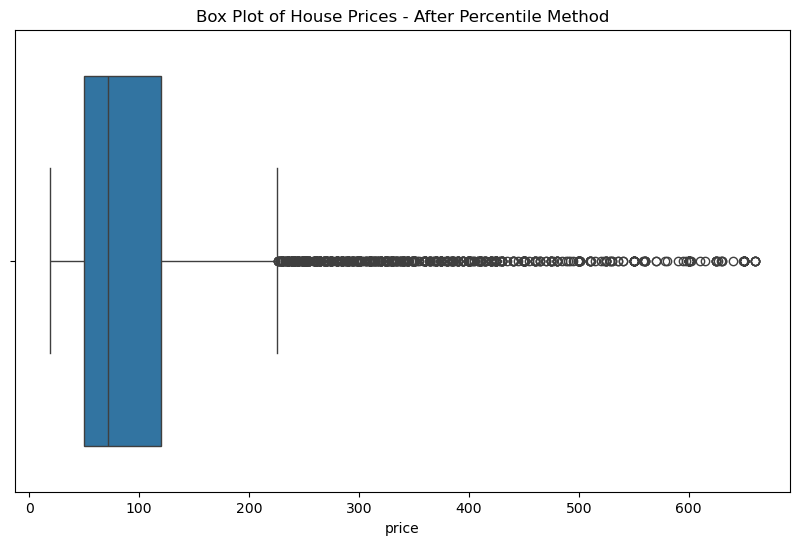

In [29]:
# # Create a box plot after outlier removal using Percentile Method
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=data1_trimmedpercentile)
plt.title('Box Plot of House Prices - After Percentile Method')
plt.show()

In [ ]:
#Alarge no,of outliers are there even after using the percentile method.

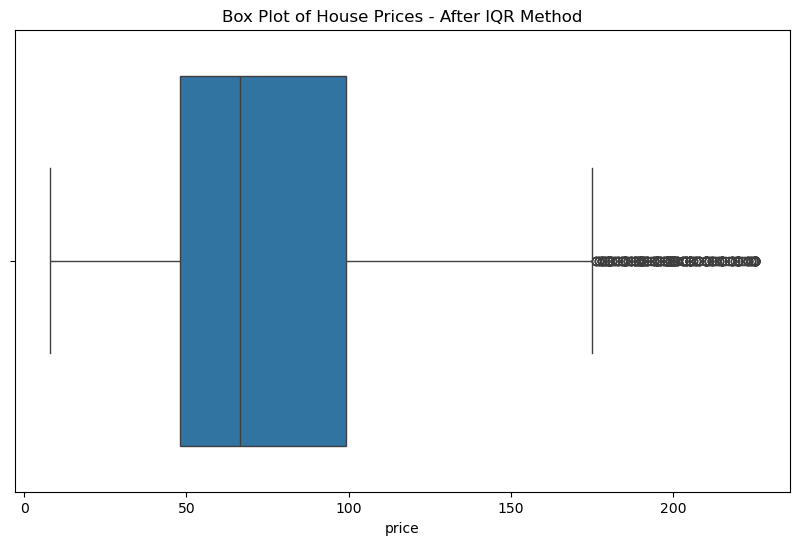

In [31]:
# # Create a box plot after outlier removal using IQR Method
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=data1_trimmediqr)
plt.title('Box Plot of House Prices - After IQR Method')
plt.show()


In [ ]:
#A remarkable no.of outliers are removed after IQR method.

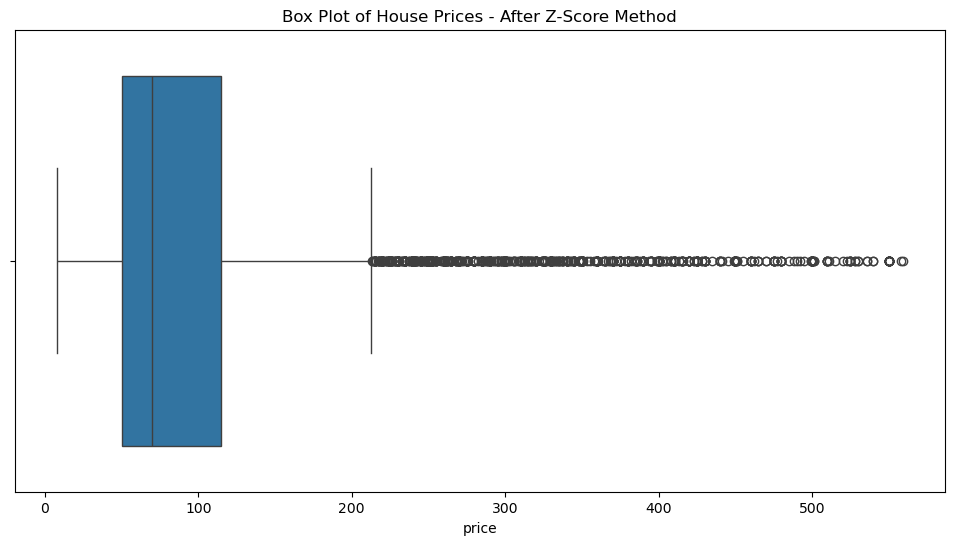

In [33]:
# # Create a box plot after outlier removal using Z-Score Method
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', data=data1_trimmed_z_score)
plt.title('Box Plot of House Prices - After Z-Score Method')
plt.show()

In [ ]:
#Outliers are in excess even after using Z-score method.

According to me the best way to remove outliers from this data is IQR method.

Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed.
Check the skewness and kurtosis before and after the transformation. 


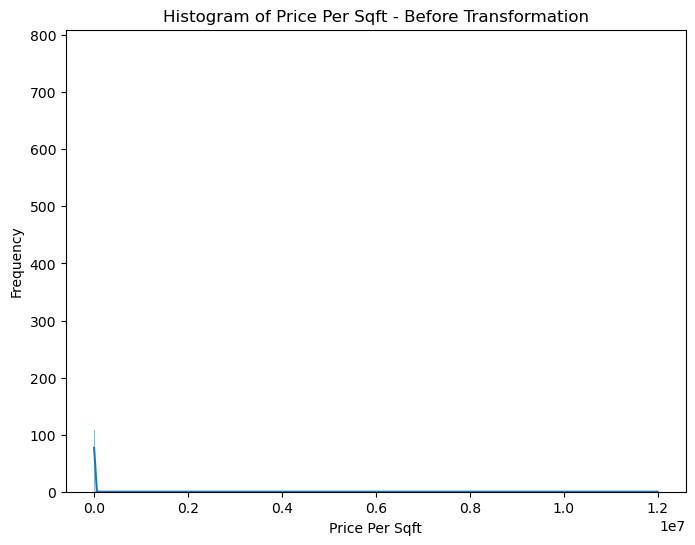

Original Skewness: 108.26875024325159
Original Kurtosis: 12090.633538860382


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Assuming 'price_per_sqft' is the target column
price_per_sqft = data1['price_per_sqft']

# 1. Draw histplot for normality check before transformation
plt.figure(figsize=(8, 6))
sns.histplot(price_per_sqft, kde=True)  # Add KDE for a smoother representation
plt.title('Histogram of Price Per Sqft - Before Transformation')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

# 2. Calculate skewness and kurtosis before transformation
original_skewness = skew(price_per_sqft)
original_kurtosis = kurtosis(price_per_sqft)

print(f'Original Skewness: {original_skewness}')
print(f'Original Kurtosis: {original_kurtosis}')


In [43]:
# # 3. Apply transformation (e.g., log transformation)
# # Add a small constant to avoid log(0) if necessary
transformed_price_per_sqft = np.log(price_per_sqft + 1)


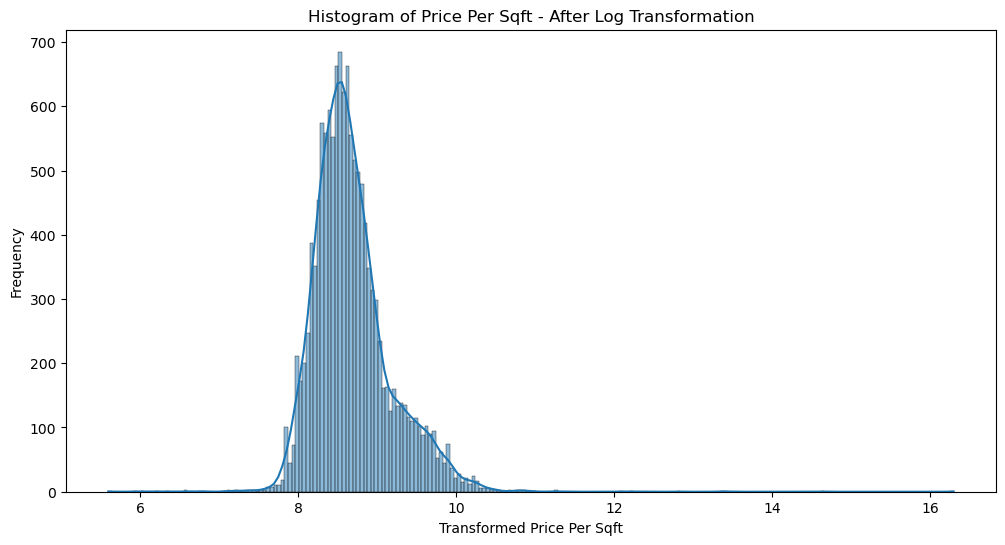

Transformed Skewness: 1.4003259019533636
Transformed Kurtosis: 9.203000543610957


In [45]:
# # 4. Draw histplot for normality check after transformation
plt.figure(figsize=(12, 6))
sns.histplot(transformed_price_per_sqft, kde=True)
plt.title('Histogram of Price Per Sqft - After Log Transformation')
plt.xlabel('Transformed Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

# # 5. Calculate skewness and kurtosis after transformation
transformed_skewness = skew(transformed_price_per_sqft)
transformed_kurtosis = kurtosis(transformed_price_per_sqft)

print(f'Transformed Skewness: {transformed_skewness}')
print(f'Transformed Kurtosis: {transformed_kurtosis}')

Q5. Check the correlation between all the numerical columns and plot heatmap. 


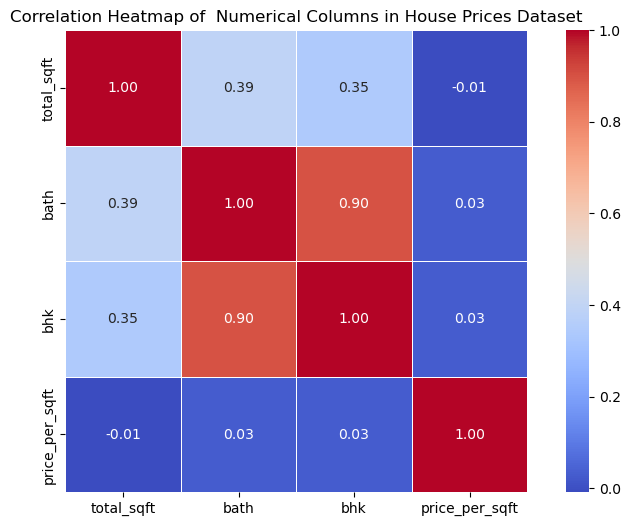

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Select the numerical columns 
numerical_columns = ['total_sqft', 'bath', 'bhk', 'price_per_sqft']
house_price_numerical = data1[numerical_columns]

#  Calculate the correlation matrix
correlation_matrix = house_price_numerical.corr()

#  Plot the heatmap
plt.figure(figsize=(10, 6))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True, linewidths=.5)
plt.title('Correlation Heatmap of  Numerical Columns in House Prices Dataset')
plt.show()

DATA STORY:
There is a perfect +ve 1 correlation between total_sqft and price_per_sqft,means that when one variable increases the other one also increases.
When the no.of bed rooms and bathrooms increases natually the total_sqft increases and price per sqft also increases.

Q6. Draw Scatter plot between the variables to check the correlation between them

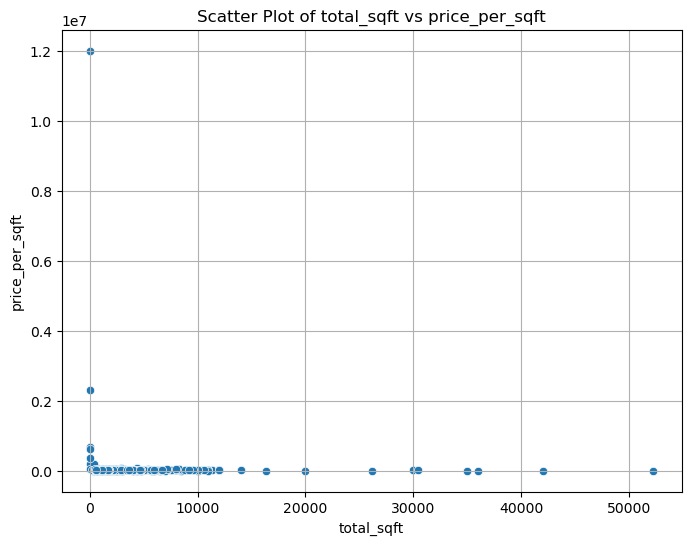

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price_per_sqft', data=data1)

# Add titles and labels
plt.title('Scatter Plot of total_sqft vs price_per_sqft')
plt.xlabel('total_sqft')
plt.ylabel('price_per_sqft')

# Show grid
plt.grid()

# Show the plot
plt.show()

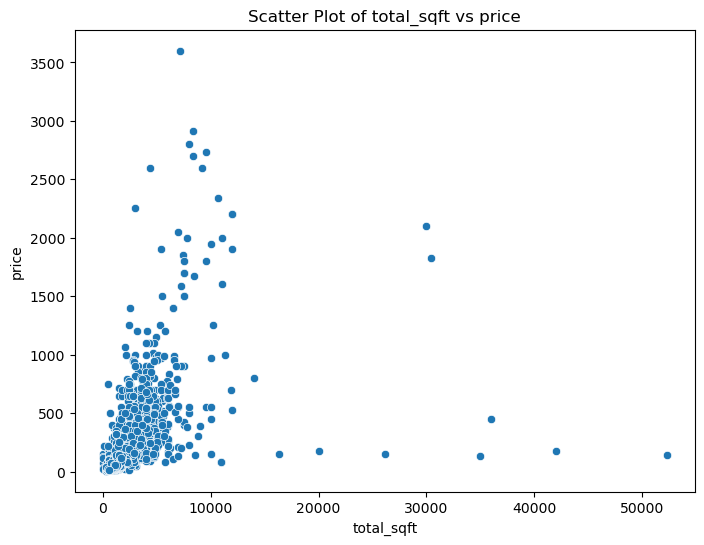

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='price', data=data1)

# Add titles and labels
plt.title('Scatter Plot of total_sqft vs price')
plt.xlabel('total_sqft')
plt.ylabel('price')

# Show the plot
plt.show()

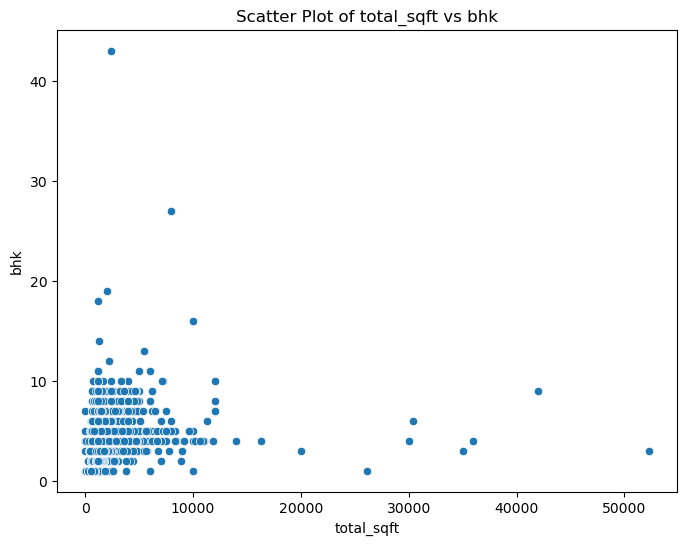

In [57]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_sqft', y='bhk', data=data1)

# Add titles and labels
plt.title('Scatter Plot of total_sqft vs bhk')
plt.xlabel('total_sqft')
plt.ylabel('bhk')

# Show the plot
plt.show()

In [ ]:
Most of the bhk s are between 0-10000 sqft.

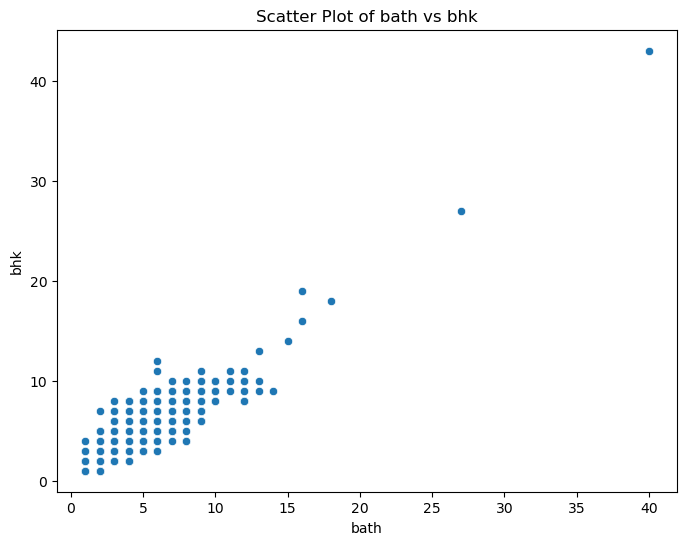

In [59]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='bhk', data=data1)

# Add titles and labels
plt.title('Scatter Plot of bath vs bhk')
plt.xlabel('bath')
plt.ylabel('bhk')

# Show the plot
plt.show()

As the no.of bed rooms increases no.of bath rooms also increases.

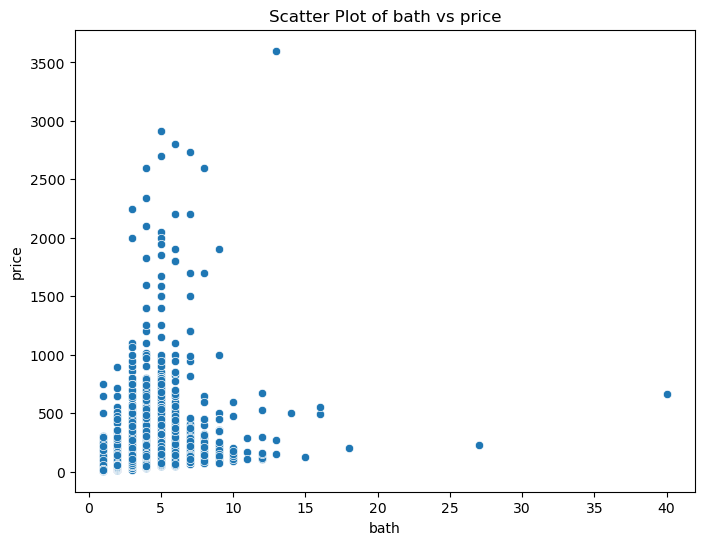

In [61]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price', data=data1)

# Add titles and labels
plt.title('Scatter Plot of bath vs price')
plt.xlabel('bath')
plt.ylabel('price')

# Show the plot
plt.show()

As the no.of bath rooms increases the price is increased.